In [27]:
import scipy as sp
import numpy as np
from scipy import integrate

In [28]:
sp.__version__

'1.5.3'

#ejemplo SIR. Aunque es un poco raro, limite de poblacion infinita

s(0)=1.0, I(0)=0.0000001, R(0)=1.0

dS = - k S I
dR = a I
dI = k S I - a I


In [40]:
k=0.04
a=0.01
def dSIR(t,sir):
    #aqui podriamos simular medidas a base de poner k dependiendo de t
    s,i,r = sir
    ds = - k * s * i
    dr = a * i
    di = - ds - dr
    return ds, di, dr



In [41]:
k=0.3
a=0.1
result=integrate.solve_ivp(dSIR,(0,365),(1.0,0.000001,0.0),
method='RK45',
t_eval=np.linspace(0,365,200))

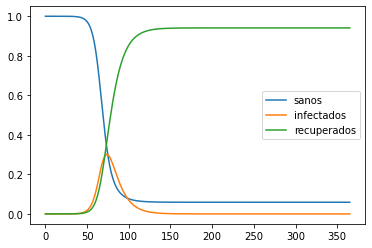

In [43]:
import matplotlib.pyplot as plt
plt.plot(result.t, result.y.T) #mirad el error si no se traspone
plt.legend(['sanos','infectados','recuperados'])

In [86]:
def dSIRdanza(t,sir):
    #aqui podriamos simular medidas a base de poner k dependiendo de t
    s,i,r = sir
    k0 = k if i < 0.1 else k/10
    ds = - k0 * s * i
    dr = a * i
    di = - ds - dr
    return ds, di, dr

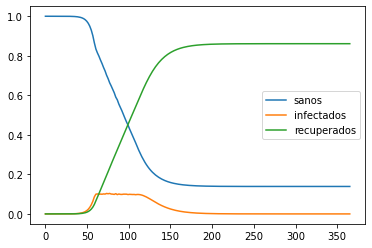

In [88]:
#la danza vale para aterrizar sin overshoot en la inmunidad de grupo
result=integrate.solve_ivp(dSIRdanza,(0,365),(1.0,0.000001,0.0),
method='RK45',
t_eval=np.linspace(0,365,200))
plt.plot(result.t, result.y.T) 
plt.legend(['sanos','infectados','recuperados'])

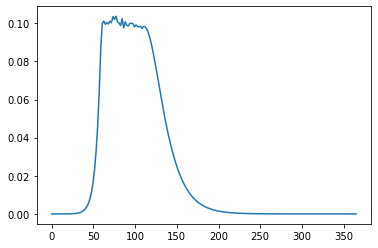

In [89]:
plt.plot(result.t, result.y[1]) 

In [77]:
def dSIRconf(t,sir):
    #aqui podriamos simular medidas a base de poner k dependiendo de t
    s,i,r = sir
    k0 = k if t < 61 else k/10
    ds = - k0 * s * i
    dr = a * i
    di = - ds - dr
    return ds, di, dr

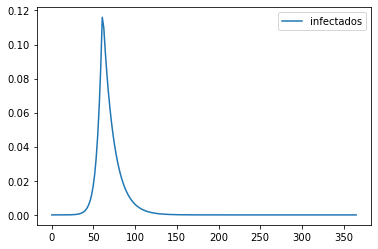

In [78]:
result=integrate.solve_ivp(dSIRconf,(0,365),(1.0,0.000001,0.0),
method='RK45',
t_eval=np.linspace(0,365,200))
plt.plot(result.t, result.y[1]) 
plt.legend(['infectados'])

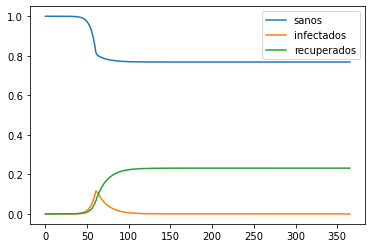

In [79]:
plt.plot(result.t, result.y.T) 
plt.legend(['sanos','infectados','recuperados'])

In [90]:
##y si que queremos pasar mas argumentos a la funcion?
## Podemos bien usar args=(a,b,c,d) en el solver
## o usar functools.partial(f, a=xxx) 